<p style=" background-color:#221f1f;font-family:newtimeroman;font-size:200%;color:#ff9900;text-align:center;border-radius:20px 20px;"><span  style = "padding : 50px; display : block; "><b >EDA Project </b></span></p>

<b>Contains:</b>
<ul>
<li><a href="#import-library">Importing Libraries</a></li>
<li><a href="#loading-dataset">Loading The Dataset</a></li>
<li><a href="#understanding-dataset">Understanding The Dataset</a></li>
<li><a href="#organizing-columns">Organizing Columns</a></li>
<li><a href="#nan-values">NaN Values</a></li>
<li><a href="#data-visualization">Data Visualization</a></li>
</ul>

<a id='import-library'></a>
# <font color='firebrick'> <b>Importing Libraries</b><font color='black'> 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px

from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='firebrick'> <b>Loading The Dataset</b><font color='black'> 

In [5]:
df0 = pd.read_csv("synthetic_dataset_with_missing (1).csv")
df = df0.copy()

In [181]:
df.head()

,User ID,Age,Gender,Country,Purchase Amount,Purchase Date,Product Category
0,1,56.0,Female,USA,331.79,2021-11-21,Sports
1,2,69.0,Male,Australia,335.72,2022-03-05,Home & Kitchen
2,3,46.0,NaN,Germany,493.18,NaN,Books
3,4,32.0,Male,Germany,80.97,2023-06-08,Sports
4,5,60.0,Female,UK,21.75,NaN,Beauty


<a id='understanding-dataset'></a>
# <font color='firebrick'> <b>Understanding The Dataset</b><font color='black'> 

In [183]:
def check_df(dataframe, head = 5):
    print('------------------shape---------------')
    print(dataframe.shape)
    print('------------------types---------------')
    print(dataframe.dtypes)
    print('------------------NAN---------------')
    print(dataframe.isnull().sum())
    print('------------------describe---------------')
    print(dataframe.describe().T)

In [184]:
check_df(df)

------------------shape---------------
(15000, 7)
------------------types---------------
User ID               int64
Age                 float64
Gender               object
Country              object
Purchase Amount     float64
Purchase Date        object
Product Category     object
dtype: object
------------------NAN---------------
User ID                0
Age                 1500
Gender               750
Country             1200
Purchase Amount     1800
Purchase Date       1050
Product Category     900
dtype: int64
------------------describe---------------
                   count        mean          std    min       25%       50%  \
User ID          15000.0  7500.50000  4330.271354   1.00  3750.750  7500.500   
Age              13500.0    43.39600    14.927082  18.00    31.000    43.000   
Purchase Amount  13200.0   253.21772   143.113919   5.05   130.335   253.645   

                       75%       max  
User ID          11250.250  15000.00  
Age                 56.000     69.0

In [185]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 15000  │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA    ┃ NA %  ┃ mean   ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ User ID            │     0 │     0 │   7500 │   4330 │     1 │   3751 │   7500 │  11250 │  15000 │ ▇▇▇▇▇▇  │  │
│ │ Age                │  1500 │    10 │   43.4 │  14.93 │    18 │     31 │     43 │     56 │     69 │ ▇▇▇▇▇▇  │  │
│ │ Purchase Amount    │  1800 │    12 │  253.2 │  143.1 │  5.05 │  130.3 │  253.6 │  378.6 │  499.9 │ ▇▇▇▇▇▇  │  │
│ └────────────────────┴───────┴───────┴────────┴────────┴───────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA        ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                          │       750 │         5 │                      0.95 │                14250 │  │
│ │ Country                         │      1200 │         8 │                      0.92 │                13800 │  │
│ │ Purchase Date                   │      1050 │         7 │                      0.93 │                13950 │  │
│ │ Product Category                │       900 │         6 │                       1.3 │                18818 │  │
│ └─────────────────────────────────┴───────────┴───────────┴───────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

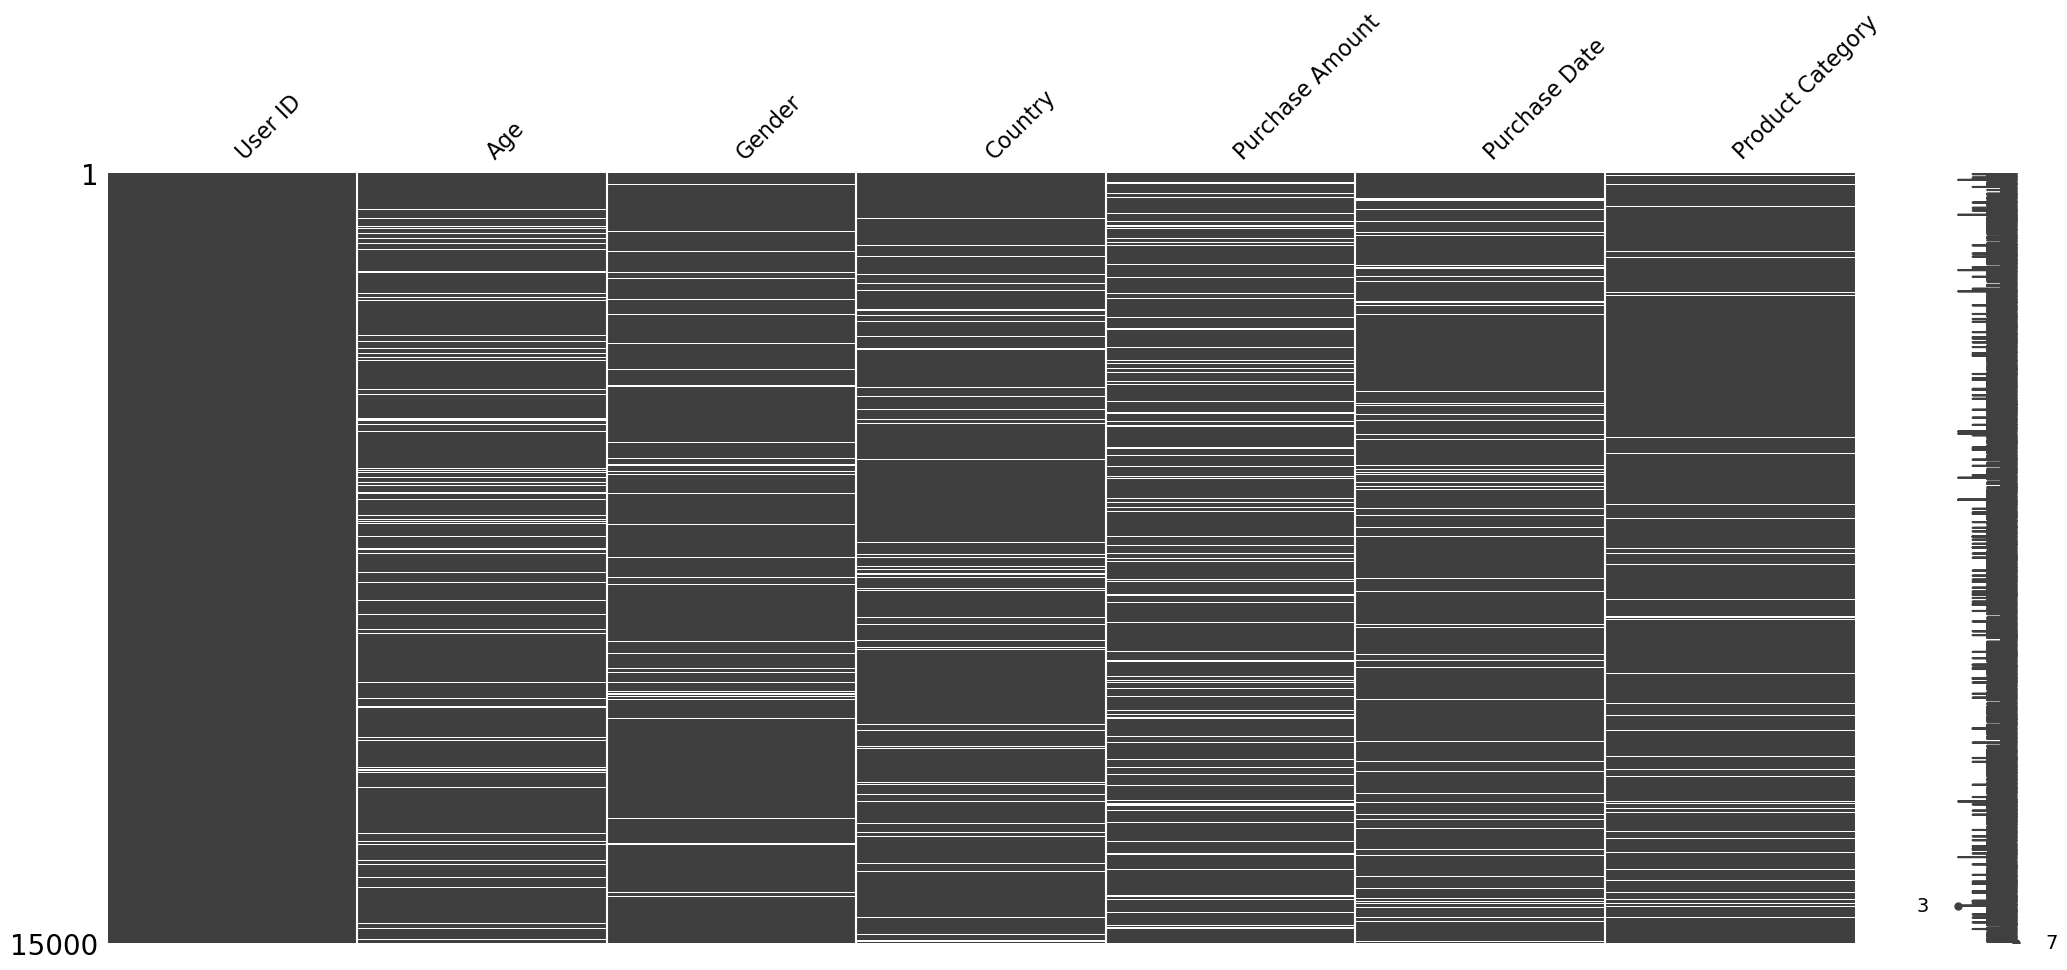

In [186]:
msno.matrix(df);

In [187]:
df.nunique()

User ID             15000
Age                    52
Gender                  3
Country                 6
Purchase Amount     11608
Purchase Date        1460
Product Category        6
dtype: int64

In [8]:
df.duplicated().sum()

0

<a id='organizing-columns'></a>
# <font color='firebrick'> <b>Organizing Columns</b><font color='black'> 

In [189]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Country', 'Purchase Amount',
       'Purchase Date', 'Product Category'],
      dtype='object')

In [15]:
df.columns = df.columns.str.lower()

In [17]:
df.columns = ['user_id', 'age', 'gender', 'country', 'purchase_amount',
       'purchase_date', 'product_category']

## <font color='indianred'> <b>"age" Column</b><font color='black'> 

In [36]:
df.age.nunique()

52

In [19]:
df.age.unique()

array([56., 69., 46., 32., 60., nan, 38., 36., 40., 28., 41., 53., 57.,
       20., 19., 61., 55., 50., 29., 39., 42., 66., 44., 59., 33., 64.,
       68., 54., 26., 35., 21., 31., 67., 43., 37., 24., 25., 34., 23.,
       51., 27., 48., 65., 62., 58., 18., 52., 22., 45., 49., 47., 30.,
       63.])

In [21]:
df.age.isnull().sum()

1500

## <font color='indianred'> <b>"gender" Column</b><font color='black'> 

In [34]:
df.gender.nunique()

3

In [24]:
df.gender.unique()

array(['Female', 'Male', nan, 'Other'], dtype=object)

In [26]:
df.gender.isnull().sum()

750

## <font color='indianred'> <b>"country" Column</b><font color='black'> 

In [32]:
df.country.nunique()

6

In [30]:
df.country.unique()

array(['USA', 'Australia', 'Germany', 'UK', 'France', 'Canada', nan],
      dtype=object)

## <font color='indianred'> <b>"purchase_amount" Column</b><font color='black'> 

In [39]:
df.purchase_amount.nunique()

11608

In [41]:
df.purchase_amount.unique()

array([331.79, 335.72, 493.18, ...,  27.73, 108.57, 105.57])

In [50]:
df.purchase_amount.isnull().sum()

1800

## <font color='indianred'> <b>"purchase_date" Column</b><font color='black'> 

In [44]:
df.purchase_date.nunique()

1460

In [46]:
df.purchase_date.unique()

array(['2021-11-21', '2022-03-05', nan, ..., '2023-09-03', '2023-10-27',
       '2023-01-07'], dtype=object)

In [48]:
df.purchase_date.isnull().sum()

1050

## <font color='indianred'> <b>"product_category" Column</b><font color='black'> 

In [57]:
df.product_category.unique()

array(['Sports', 'Home & Kitchen', 'Books', 'Beauty', 'Clothing', nan,
       'Electronics'], dtype=object)

In [59]:
df.product_category.nunique()

6

In [61]:
df.product_category.isnull().sum()

900

In [194]:
df.user_id.duplicated().sum()

0

In [195]:
df.country = df.country.str.strip()

In [196]:
df.country.unique()

array(['USA', 'Australia', 'Germany', 'UK', 'France', 'Canada', nan],
      dtype=object)

<a id='nan-values'></a>
# <font color='firebrick'> <b>NaN Values</b><font color='black'> 

In [198]:
df.age.mean()

43.396

In [199]:
df.age.median()

43.0

In [200]:
df.country.value_counts().idxmax()

'France'

In [201]:
df.groupby("product_category")["purchase_amount"].mean()

product_category
Beauty            250.150567
Books             252.247397
Clothing          256.174708
Electronics       254.586955
Home & Kitchen    252.097199
Sports            253.450363
Name: purchase_amount, dtype: float64

In [202]:
countries  = ['USA', 'Australia', 'Germany', 'UK', 'France', 'Canada']
countries

['USA', 'Australia', 'Germany', 'UK', 'France', 'Canada']

In [251]:
df['country'] = df['country'].apply(lambda x: np.random.choice(countries) if pd.isna(x) else x)

In [253]:
df.country.isnull().sum()

0

In [255]:
df.country.value_counts()

country
France       2675
Germany      2519
Canada       2468
UK           2462
Australia    2447
USA          2429
Name: count, dtype: int64

In [261]:
df['product_category'] = df['product_category'].fillna(df.groupby('country')['product_category'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None))

In [263]:
df.product_category.isnull().sum()

0

In [267]:
df.groupby("product_category")["gender"].mode()[0]

AttributeError: 'SeriesGroupBy' object has no attribute 'mode'

In [311]:
df.gender.fillna(df.groupby(["product_category","country"])["gender"].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None),inplace = True)

In [313]:
df.gender.isnull().sum()

0

In [301]:
df.groupby(["product_category", "country"])["gender"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

product_category  country  
Beauty            Australia      Male
                  Canada       Female
                  France         Male
                  Germany        Male
                  UK           Female
                  USA          Female
Books             Australia      Male
                  Canada       Female
                  France         Male
                  Germany       Other
                  UK             Male
                  USA          Female
Clothing          Australia      Male
                  Canada       Female
                  France       Female
                  Germany        Male
                  UK             Male
                  USA           Other
Electronics       Australia     Other
                  Canada       Female
                  France       Female
                  Germany       Other
                  UK             Male
                  USA          Female
Home & Kitchen    Australia    Female
                  Cana

In [277]:
mode_values

product_category  country  
Beauty            Australia      Male
                  Canada       Female
                  France         Male
                  Germany        Male
                  UK           Female
                  USA          Female
Books             Australia      Male
                  Canada       Female
                  France         Male
                  Germany       Other
                  UK             Male
                  USA          Female
Clothing          Australia      Male
                  Canada       Female
                  France       Female
                  Germany        Male
                  UK             Male
                  USA           Other
Electronics       Australia     Other
                  Canada       Female
                  France       Female
                  Germany       Other
                  UK             Male
                  USA          Female
Home & Kitchen    Australia    Female
                  Cana

In [295]:
df.groupby(['country','product_category'])['purchase_amount'].mean)

SyntaxError: unmatched ')' (3171877991.py, line 1)

In [297]:
df['purchase_amount'] =df['purchase_amount'].fillna(df.groupby(['country','product_category'])['purchase_amount'].transform(lambda x: x.mean()))

In [ ]:
df['purchase_amount'] =

<a id='data-visualization'></a>
# <font color='firebrick'> <b>Data Visualization</b><font color='black'> 

In [317]:
df.dtypes

user_id               int64
age                 float64
gender               object
country              object
purchase_amount     float64
purchase_date        object
product_category     object
dtype: object

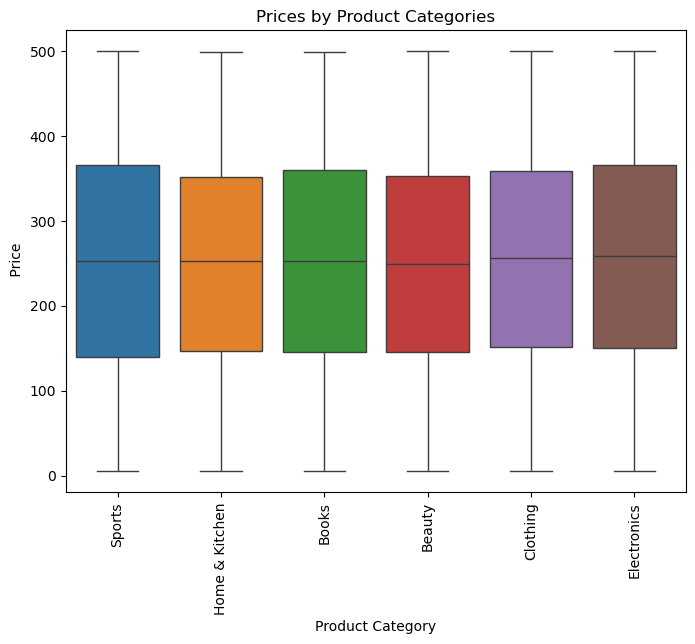

In [319]:
plt.figure(figsize=(8, 6))  
sns.boxplot(x='product_category', y='purchase_amount', data=df, palette='tab10')  
plt.title("Prices by Product Categories") 
plt.xticks(rotation=90) 
plt.xlabel("Product Category")  
plt.ylabel(" Price")  
plt.show()  

In [ ]:
sns.scatterplot(data=df, x='', y='count', marker='o',color = "red")
plt.title('total order & rating')
plt.show()

<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>THANK YOU!</b></p>